In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df_full = pd.read_csv(r'/home/agastya/Documents/Python/Praxis/ML/Personal Practice/Spotify_Project/data/data.csv', ',')

In [3]:
df_w_genres = pd.read_csv(r'/home/agastya/Documents/Python/Praxis/ML/Personal Practice/Spotify_Project/data/data_w_genres.csv', ',')

In [40]:
df_only_genres = pd.read_csv(r'/home/agastya/Documents/Python/Praxis/ML/Personal Practice/Spotify_Project/data/data_by_genres.csv', ',')

In [41]:
df_only_genres.head(1)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.49478,0.299333,1.048887e+06,0.450678,0.477762,0.131,-16.854,0.076817,120.285667,0.22175,52.166667,5,1


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


In [39]:
df_w_genres.head(1)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.44275,247260.0,0.386336,0.022717,0.287708,-14.205417,0.180675,115.9835,0.334433,38.0,5,1,12,[show tunes]


In [4]:
# Keep a backup
df_w_genres_raw = df_w_genres.copy()

In [22]:
df_full.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
# Convert genres from string to list 
import re
pattern = re.compile(r"\'(.*?)\'", re.IGNORECASE)
df_w_genres['genres'] = df_w_genres['genres'].map(lambda x: re.findall(pattern, x))

# Change fields of no genres to None
df_w_genres['genres'] = df_w_genres['genres'].map(lambda x: np.nan if len(x) == 0 else x)

In [6]:
# Drop all items that do not have a genre
df_w_genres = df_w_genres.drop(df_w_genres[df_w_genres['genres'].isna()].index)
df_w_genres.reset_index(inplace=True)
df_w_genres.drop('index', axis=1, inplace=True)

In [12]:
df_w_genres.head(1)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.44275,247260.0,0.386336,0.022717,0.287708,-14.205417,0.180675,115.9835,0.334433,38.0,5,1,12,[show tunes]


In [7]:
df_w_genres['genres'].map(lambda x: len(x)).agg(['max', 'min'])

max    23
min     1
Name: genres, dtype: int64

In [8]:
def same_genre_artists(artist):
    '''
    Returns a pandas series with the index number of artists who have the same genre.
    The series will also have the same artist as well
    '''
    genre_to_look = df_w_genres[df_w_genres['artists']==artist]['genres'].values[0]
    index_of_matched_genres = []
    for i in genre_to_look:
        index_of_matched_genres.extend(df_w_genres[df_w_genres['genres'].map(lambda x: i in x)].index)
    return pd.Series(index_of_matched_genres)

In [18]:
df_w_genres[df_w_genres['artists']=='Shreya Ghoshal']['genres'].values[0]

['desi hip hop', 'desi pop', 'filmi', 'modern bollywood', 'sufi']

In [30]:
beatles_gen_artists = same_genre_artists('Eminem')

In [31]:
beatles_gen_artists.value_counts()

1677     3
1282     3
3522     3
11679    3
17597    3
        ..
4912     1
16809    1
1566     1
11210    1
17432    1
Length: 693, dtype: int64

In [33]:
df_w_genres.iloc[beatles_gen_artists.value_counts().index].head(50)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
1677,Big Sean,0.148857,0.683203,240459.048780,0.670740,1.423919e-03,0.234749,-5.641724,0.208774,120.908033,0.450393,58.764228,1,1,123,"[detroit hip hop, hip hop, pop, pop rap, rap, ..."
1282,Bad Meets Evil,0.126667,0.603467,240684.333333,0.861933,8.012000e-06,0.337933,-4.309533,0.313000,127.085333,0.566667,55.200000,1,1,15,"[detroit hip hop, gangster rap, hip hop, pop r..."
3522,D12,0.130177,0.768844,293581.555556,0.753956,1.471486e-03,0.196000,-4.178578,0.253018,106.654978,0.569378,50.511111,11,0,45,"[detroit hip hop, gangster rap, hip hop, pop r..."
11679,Obie Trice,0.078569,0.753278,249877.777778,0.760889,1.307939e-03,0.207856,-4.026167,0.268278,109.414500,0.544056,50.777778,10,1,18,"[detroit hip hop, gangster rap, hardcore hip h..."
17597,Xzibit,0.153139,0.811812,235535.062500,0.673031,2.058213e-03,0.203484,-5.104313,0.256688,93.189219,0.706875,51.781250,5,0,32,"[detroit hip hop, g funk, gangster rap, hardco..."
15138,Tee Grizzley,0.186671,0.767824,209317.647059,0.686941,4.823529e-07,0.180135,-6.464941,0.262188,105.175706,0.467706,65.588235,1,1,17,"[detroit hip hop, detroit trap, hip hop, pop r..."
4845,Eminem,0.145720,0.729532,263333.566794,0.742029,5.104129e-03,0.241716,-5.036927,0.274213,115.258347,0.548479,55.959924,1,1,524,"[detroit hip hop, hip hop, rap]"
1634,Big B,0.196100,0.878500,236013.000000,0.666500,0.000000e+00,0.204550,-5.300500,0.102900,109.513000,0.449000,41.000000,1,1,4,"[detroit hip hop, hip hop, pop, pop rap, rap, ..."
5663,GRiZ,0.030510,0.656250,243181.000000,0.792625,1.646380e-02,0.367850,-6.298750,0.127900,93.914875,0.506125,53.250000,6,1,8,"[detroit hip hop, detroit trap, hip hop, pop r..."
3710,Danny Brown,0.141042,0.631917,211636.916667,0.789500,4.516667e-07,0.316000,-6.530917,0.239758,109.962583,0.572333,55.333333,5,1,12,"[alternative hip hop, detroit hip hop, escape ..."


In [40]:
# Convert artists from string to list 
# Uses same pattern as the one used to convert genres
df_full['artists'] = df_full['artists'].map(lambda x: re.findall(pattern, x))

In [41]:
df_full.head(1)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,[Carl Woitschach],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.151,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928


In [35]:
# Get the number of active years for an artist
# This can also be used as a parameter (we want artists to be in the same year range as the original artist)

# Entries of one artist
df_full[df_full['artists'].map(lambda x: 'GRiZ' in x)]['year'].agg(['min', 'max'])

min    2014
max    2019
Name: year, dtype: int64

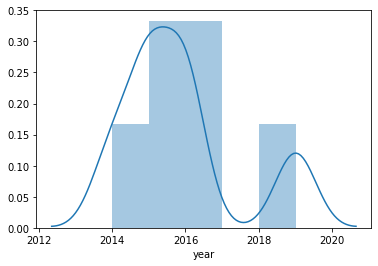

In [37]:
sb.distplot(df_full[df_full['artists'].map(lambda x: 'GRiZ' in x)]['year'])

In [44]:
df_w_genres[df_w_genres['artists']=='Eminem']

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
4845,Eminem,0.14572,0.729532,263333.566794,0.742029,0.005104,0.241716,-5.036927,0.274213,115.258347,0.548479,55.959924,1,1,524,"[detroit hip hop, hip hop, rap]"


In [43]:
df_full[df_full['artists'].map(lambda x: 'Eminem' in x)]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
6178,0.3990,"['JAY-Z', 'Eminem']",0.561,337760,0.774,1,1eAZcqDmiUE57YdeElYbMd,0.000002,1,0.1890,-3.144,0,Renegade,41,2001-09-11,0.4470,77.621,0.8200,2001
6281,0.0920,"['Obie Trice', '50 Cent', 'Eminem']",0.713,270747,0.517,1,0jRj0owDUMxxbmz2qkgtSC,0.000006,7,0.1340,-5.403,1,Love Me,42,2002-10-29,0.2370,80.986,0.2670,2002
6576,0.0507,"['Eminem', 'Nate Dogg']",0.963,274440,0.643,1,64649mwn5MP4gz1eIOAerx,0.000049,1,0.1570,-5.785,0,Shake That,48,2005-12-06,0.1170,107.005,0.5340,2005
6581,0.0337,['Eminem'],0.950,284800,0.651,1,7Bi0aRtNAdchLnVBPjDrcx,0.000000,5,0.0424,-4.226,0,The Real Slim Shady,48,2005-12-06,0.0547,104.495,0.7770,2005
6648,0.0537,['Eminem'],0.619,281133,0.746,1,18TtVZgD09HpU7lUXR0kPI,0.000000,10,0.2950,-5.479,0,When I'm Gone,48,2005-12-06,0.3600,149.944,0.7570,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168805,0.0131,['Eminem'],0.635,304907,0.712,1,1PokNDiTBQZgXci6rn2BVE,0.000000,4,0.1870,-5.151,0,Music Box,52,2009-05-15,0.1100,78.598,0.4580,2009
169230,0.3280,"['Eminem', 'Sia']",0.655,300387,0.859,1,0VZs2OQq4axr8GFRdC9nyD,0.000000,10,0.2480,-4.277,0,Guts Over Fear,53,2014-08-25,0.2210,140.049,0.5250,2014
169855,0.1750,"['Eminem', 'Skylar Grey']",0.661,265947,0.748,1,5CpsIb7SMFHjmAG8RvIWfq,0.000000,2,0.2540,-4.809,0,Leaving Heaven (feat. Skylar Grey),71,2020-01-17,0.2060,171.983,0.5090,2020
169864,0.0048,"['Eminem', 'Don Toliver']",0.756,200947,0.747,1,1lO9CZo6eDrOy0S7khgryG,0.005360,9,0.5880,-5.407,1,No Regrets (feat. Don Toliver),70,2020-01-17,0.0460,134.935,0.0687,2020


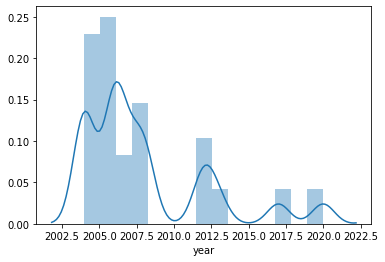

In [63]:
sb.distplot(df_full[df_full['artists'].map(lambda x: 'The Killers' in x)]['year'])

In [169]:
df_w_genres.iloc[17520]

index                                                           26594
artists                                             Within Temptation
acousticness                                                 0.155561
danceability                                                 0.316556
duration_ms                                                    263803
energy                                                       0.801333
instrumentalness                                          0.000239376
liveness                                                     0.161756
loudness                                                     -5.10133
speechiness                                                 0.0567111
tempo                                                         133.226
valence                                                      0.163444
popularity                                                    54.7778
key                                                                10
mode                

In [ ]:
df_w_genres

In [162]:
df_w_genres.iloc[index_of_matched_genres, :]

,index,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
2915,4306,Children Of Bodom,0.000441,0.430333,248742.333333,0.965000,0.562333,0.242333,-3.174000,0.056667,121.852000,0.376667,51.333333,3,1,6,"[alternative metal, finnish death metal, finni..."
11512,17536,Nightwish,0.001948,0.435417,287407.333333,0.848667,0.046787,0.149617,-5.660667,0.052133,118.389667,0.377867,47.250000,5,0,24,"[finnish metal, finnish power metal, gothic me..."
16858,25564,Turisas,0.000081,0.262000,233520.000000,0.928000,0.000048,0.195000,-2.795000,0.089400,161.925000,0.533000,59.000000,9,1,2,"[finnish metal, folk metal, melodic metal, met..."
11512,17536,Nightwish,0.001948,0.435417,287407.333333,0.848667,0.046787,0.149617,-5.660667,0.052133,118.389667,0.377867,47.250000,5,0,24,"[finnish metal, finnish power metal, gothic me..."
3372,4986,Cradle Of Filth,0.001335,0.402750,378683.750000,0.949750,0.199202,0.111675,-3.789750,0.122325,129.148250,0.153450,48.000000,2,0,8,"[alternative metal, black metal, british black..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,12652,Kamelot,0.000056,0.303000,221467.000000,0.939000,0.012800,0.108000,-6.377000,0.067100,169.970000,0.369000,52.000000,10,0,2,"[gothic symphonic metal, melodic metal, metal,..."
8909,13545,Lacuna Coil,0.000642,0.474750,253903.250000,0.780000,0.174998,0.152750,-5.361000,0.034350,124.291000,0.213175,50.750000,4,1,8,"[alternative metal, gothic metal, italian goth..."
11512,17536,Nightwish,0.001948,0.435417,287407.333333,0.848667,0.046787,0.149617,-5.660667,0.052133,118.389667,0.377867,47.250000,5,0,24,"[finnish metal, finnish power metal, gothic me..."
13070,20038,Rhapsody,0.002689,0.418500,274033.500000,0.915500,0.001061,0.272500,-3.822500,0.039150,92.493000,0.368000,52.500000,0,0,4,"[italian power metal, neo classical metal, pow..."
